In [ ]:
# importul tensorflow
import tensorflow as tf

In [ ]:
# verificarea versiunii tensorflow (trebuie sa fie 2.X+)
print(tf.__version__)

2.6.0


In [ ]:
# importul altor bibioteci necesare
import numpy as np
import matplotlib.pyplot as plt

# Crearea unor date

In [ ]:
# crearea features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

In [ ]:
# crearea labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

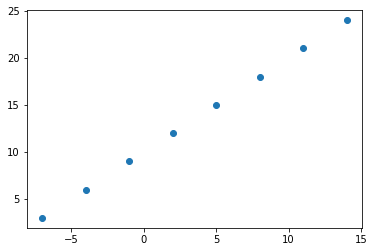

In [ ]:
# Vizualizarea lor
plt.scatter(X, y);

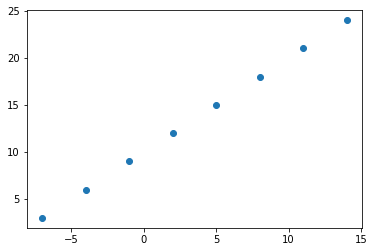

In [ ]:
# Transformarea datelor np.array in tensor
X=tf.constant(X)
y=tf.constant(y)
plt.scatter(X,y); 

In [ ]:
# Forma unui singur esantion de la intarea
input_shape = X[0].shape
input_shape


TensorShape([])

In [ ]:
# Forma unui singur esantion de la iesire
input_shape = y[0].shape
input_shape

TensorShape([])

In [ ]:
#Vizualizarea primelor elemente de la intare si de la iesire
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>)

# Pasii de modelarea in TensorFlow

Pentru crearea și trainingul unui model în tensorFlow se utilizează 3 pași:
 1. **Crearea modelului** - plasarea straturilor retelei neuronale (utilizand Functional sau Sequential API) sau importul modelului construoit anterior (Transfer Learning) 
 2. **Compilarea modelului** - definirea modului în care se măsoară performanta modelului (loss/metrics) și a modului de îmbunătățire (optimizer)
 3. **Implementarea modelului** - determinarea modelului pe baza datelor X_train și y_train

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului cu un singur nivel utilizând Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# COmpilarea modelului
model.compile(loss=tf.keras.losses.mae, # criteriul de masurarea a performantelor este mae (eroarea medie absoluta)
              optimizer=tf.keras.optimizers.SGD(), # modul de optimuzare este SGD (stochastic gradient descent)
              metrics=["mae"])

# Implementarea modelului
model.fit(X, y, epochs=5) # epochs determina de cate ori modelul va analiza datele pentru a crea o legitate

Epoch 1/5
1/1 [==============================] - 1s 573ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# realizarea predictiei pe date proprii
model.predict([17.0])

array([[12.716021]], dtype=float32)

# Îmbunatatirea modelului

Îmbunatatirea modelului poate fi realizata la fiecare dintre cei 3 pasi de formarea a modeluluiȘ
1. La crearea modelului:
 - adaugarea de noi nivele ascunse
 - cresterea numareului de neuroni în fiecare nivel
 - modeificarea functiei de activare pentru fiecare nivel
2. La compilarea modelului:
 - selactarea unuiei alte functii de optimizare
 - crestrea ratei de invatare (learning rate) a functiei de optimizare
3. La implementarea modelului:
 - crestera numarului epochs
  - marirea volumului de date

https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png

In [ ]:
# Crearea repetata a celuiasi model dar cu crestrea numarului de epochs la 100
# Setarea random seed
tf.random.set_seed(42)

# Crearea modelului cu un singur nivel utilizând Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compilarea modelului
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Implementarea modelului
model.fit(X, y, epochs=100) # epochs este 100

Epoch 1/100
1/1 [==============================] - 0s 253ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 5

In [ ]:
# realizarea predictiei pe date proprii cu noul model
model.predict([17.0])

array([[30.158512]], dtype=float32)

# Evaluarea modelului

Constructia retelei neuronale presupune:

```
Construnctia modelului -> Evaluarea lui -> Ajustarea modelului -> Evaluare lui -> Ajustarea modelului -> Evaluarea lui...
```

Evaluarea presuspun în primul rand "vizualizarea"
Ce poate fi vizualizat:
* **Datele** - cum arata datele cu care lucrezi?
* **Modelul** - cu arata arhitectua modelului?
* **Trainingul modelului** - cum funcționează un model în timp ce învață ?
* **Predictiile modelului** - cum arata predictiile comparativ cu valorile adevarate?

In [ ]:
# Crearea unui set mai mare de date

#Crearea setului X
np.random.seed(42)
X = np.arange(-100, 100, 4)

#Amestecare datelor în setul X
np.random.shuffle(X)

#crearea setului y
y = X+10
X,y

(array([ -48,   56,   20,   80,  -32,   92,    4,    0,   28,  -24,  -52,
         -84,   48,  -68,  -88,  -76,   64,   84,   88,  -40,  -64,  -36,
          -4,   36,   24, -100,   76,    8,   32,  -80,   16,  -56,   44,
         -96,  -16,  -92,   72,   40,   -8,   60,  -60,  -12,  -28,   96,
         -20,  -72,   68,  -44,   12,   52]),
 array([-38,  66,  30,  90, -22, 102,  14,  10,  38, -14, -42, -74,  58,
        -58, -78, -66,  74,  94,  98, -30, -54, -26,   6,  46,  34, -90,
         86,  18,  42, -70,  26, -46,  54, -86,  -6, -82,  82,  50,   2,
         70, -50,  -2, -18, 106, -10, -62,  78, -34,  22,  62]))

## Separarea datelor în date de training si date de test

Datele de lucru  se separa în 3 seturi:
1. **setul de trainig** pe baza lui se învață modelul (70-80%)
2. **setul de validare** pe baja lui setul este ajustat (10-15%)
3. **setul de testare** pe baza lui setul este evaluat(10-15%)

În cazul unor date de volum mic, setul de validare se exclude, setul de training constang în 80% din date iar cel de testare - 20%

In [ ]:
# Divizarea datelor în set de training si set de testare
X_train = X[:40] # primele 40 valori (80% din date)
y_train = y[:40]

X_test = X[40:] # ultimile 10 valori (20% din date)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

##Vizualizarea datelor

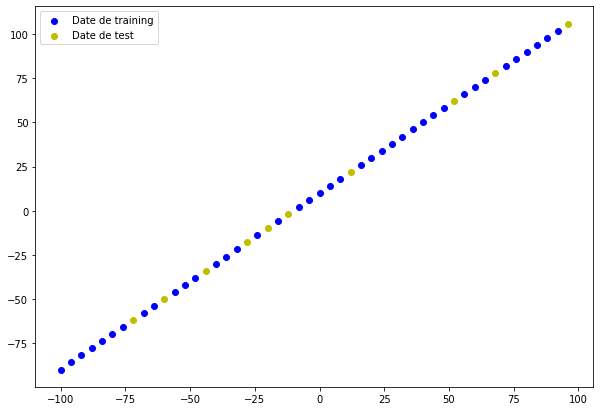

In [ ]:
#Construirea graficului de vizualizare a datelor

plt.figure(figsize=(10, 7))

# Setul de training va fi reprezenta cu albastru
plt.scatter(X_train, y_train, c='b', label='Date de training')

# Setul de test va fi reprezentat cu galben
plt.scatter(X_test, y_test, c='y', label='Date de test')

# afișarea legendei
plt.legend();

## Vizualizarea modelului

Vizualizarea modelului poate fi realizata prin:
 - functia `summary()`
 - functia `plot_model()`

In [ ]:
#Construirea modelului fara implementarea acestuia dar cu setarea formei de la intrare (input_shape)

# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # definirea input_shape pentru model
])

# Compilarea modelului
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Vizualizarea modelului cu funtia summary()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Apeland `summary()` asupra modelului se afiseaza informatia despre nivele si continutul lor, forma de la iesire si numarul de parametri.
* **Total params** - numarul total de parametri ai modelului.
* **Trainable params** - parametrii pe care modelul ii poate modifica in timpul trainingului.
* **Non-trainable parameters** - parametrii care nu pot fi modificati in timpul trainingului (fixati in modelul adus prin transfer learning).

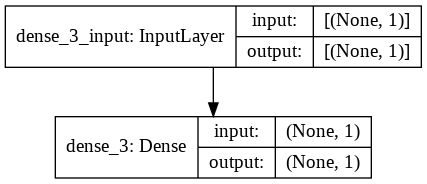

In [ ]:
# Vizualizarea modelului cu funtia plot_model()
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Vizualizarea predictiilor

In [ ]:
# Realizarea predictiei
y_preds = model.predict(X_test)

In [ ]:
#Vizualizarea predictiilor
y_preds

array([[-34.203594 ],
       [ -6.8407187],
       [-15.961678 ],
       [ 54.72575  ],
       [-11.401197 ],
       [-41.04431  ],
       [ 38.764072 ],
       [-25.082636 ],
       [  6.8407187],
       [ 29.643114 ]], dtype=float32)

In [ ]:
# Crearea unei functii de afisare grafica a datelor de training, de test si de predictie:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Afiseaza datele de training, de test si de predictie pentru comparare.
  """
  plt.figure(figsize=(10, 7))

  # Afisarea datelor de training cu albastru
  plt.scatter(train_data, train_labels, c="b", label="Date de training")

  # Afisarea datelor de test cu galben
  plt.scatter(test_data, test_labels, c="y", label="Date de test")

  # Afisarea datelor prezise cu rosu
  plt.scatter(test_data, predictions, c="r", label="Datele prezise")

  # afișarea legendei
  plt.legend();

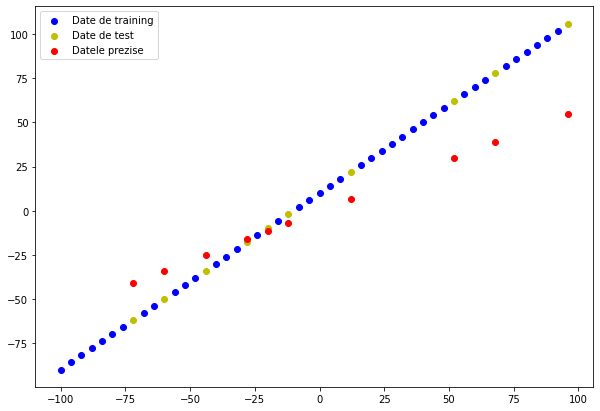

In [ ]:
# apelara functiei de afisare incuzand datele obtinute la predictie
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

## Evaluarea predictiei

Pentru problemele de predictie sunt metodologii de evaluare metric[ a predictiei:
* **Eroare medie absoluta - Mean absolute error (MAE)** - diferenta medie dintre fiecare predictie.
* **Eraorea medie patratica - Mean squared error (MSE)** - diferenta medie patratica dintre fiecare predictie.

Evaluarea modelului se poate realiza cu metoda model.evaluate() care returneaza valorile loss si metrics setate la compilarea modelului

In [ ]:
# Evaluarea modelului pe datele de test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 169ms/step - loss: 19.1976 - mae: 19.1976


[19.19760513305664, 19.19760513305664]

In [ ]:
# determinarea erorii medii absolute (MAE) a predictiilor
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # se utilizeaza squeeze() pentru a le face de aceeasi forma
mae

<tf.Tensor: shape=(), dtype=float32, numpy=19.197605>

In [ ]:
# determinarea erorii medii patratice (MSE) a predictiilor
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=624.30164>

In [ ]:
# Crearea a dou functii care ar permite determinarea mae si mse pentru datele prezise
def mae(y_test, y_pred):
  """
  Calculeaza eroarea media absoluta dintre y_test si y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculeaza eroarea media patratica dintre y_test si y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

# Experimente pentru imbunatatirea modelului

Pornind de la modelul elaborat mai sus se vor crea mai multe model in care se vor varia diferiti hyper-parametri si se vor compara rezultatele:
1. `model_1` - modelul initial
2. `model_2` - model_1 cu 2 nivele
3. `model_3` - model_2 cu 500 epochs
4. `model_4` - model_3 cu functia de optimizare Adam
5. `model_5` - model_4 cu learning_rate modificat de la 0.001 (implicit) la 0.01

**Constructia `model_1`**

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# compilara modelu;lui
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Implementarea modelului
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 21.9304 - mae: 21.9304
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9979 - mae: 9.9979
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8153 - mae: 9.8153
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 10.6226 - mae: 10.6226
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 17.3488 - mae: 17.3488
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3761 - mae: 9.3761
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.7293 - mae: 12.7293
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 12.9893 - mae: 12.9893
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2014 - mae: 10.2014
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9438 - mae: 10.9438
Epoch 11/100
2/2 [==============================] - 0s 3ms/step -

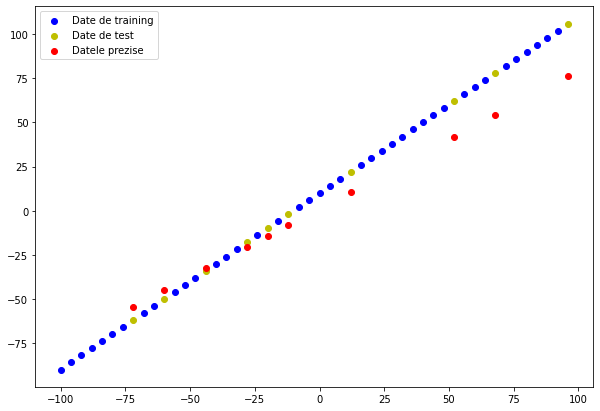

In [ ]:
# crearea predictiei si afisarea graficului acesteia
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calcularea erorilor pentru model_1
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(11.072192, 212.25468)

**Constructia `model_2`**

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # adaugarea nivelului 2
])

# compilara modelu;lui
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Implementarea modelului
model_2.fit(X_train, y_train, epochs=100, verbose=0)

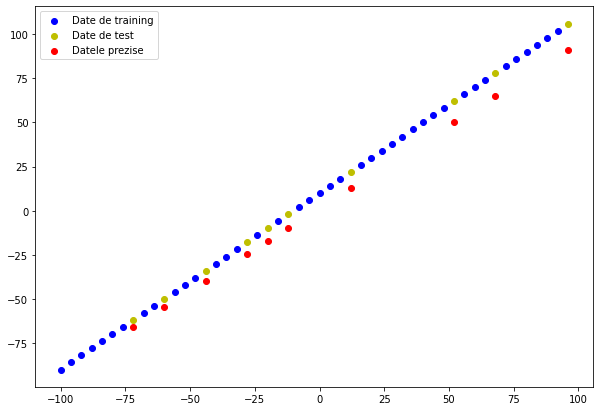

In [ ]:
# crearea predictiei si afisarea graficului acesteia
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calcularea erorilor pentru model_2
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(8.544662, 85.27019)

**Constructia `model_3`**

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) 
])

# compilara modelului
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Implementarea modelului
model_3.fit(X_train, y_train, epochs=500, verbose=0) # modificare epochs din 100 in 500

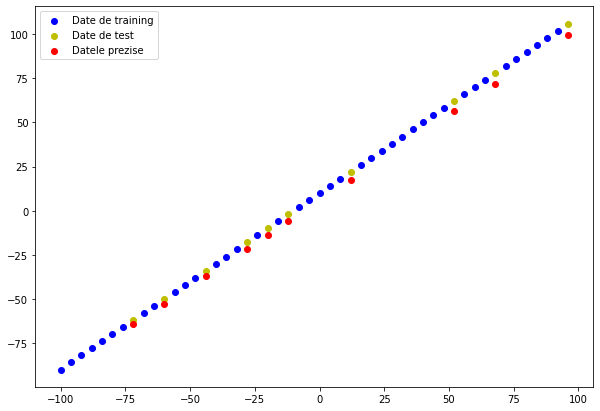

In [ ]:
# crearea predictiei si afisarea graficului acesteia
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calcularea erorilor pentru model_3
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(4.2486877, 19.936207)

**Constructia `model_4`**

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) 
])

# compilara modelu;lui
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), # modificare functie din SGD in Adam
                metrics=['mae'])

# Implementarea modelului
model_4.fit(X_train, y_train, epochs=500, verbose=0) 

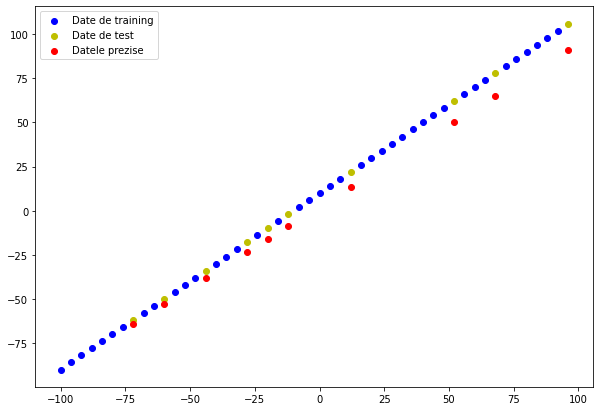

In [ ]:
# crearea predictiei si afisarea graficului acesteia
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [ ]:
# Calcularea erorilor pentru model_4
mae_4 = mae(y_test, y_preds_4.squeeze()).numpy()
mse_4 = mse(y_test, y_preds_4.squeeze()).numpy()
mae_4, mse_4

(7.540657, 73.53961)

**Constructia `model_5`**

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) 
])

# compilara modelu;lui
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.01), # modificare learning_rate de la 0.001 (implicit) la 0.01
                metrics=['mae'])

# Implementarea modelului
model_5.fit(X_train, y_train, epochs=500, verbose=0) 

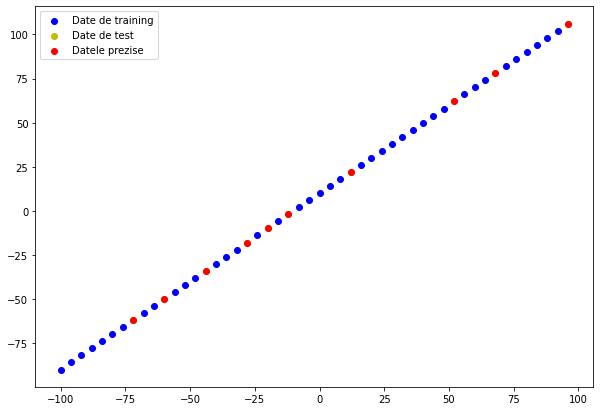

In [ ]:
# crearea predictiei si afisarea graficului acesteia
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [ ]:
# Calcularea erorilor pentru model_5
mae_5 = mae(y_test, y_preds_5.squeeze()).numpy()
mse_5 = mse(y_test, y_preds_5.squeeze()).numpy()
mae_5, mse_5

(0.075689174, 0.007809627)

## Compararea rezultatelor

In [ ]:
# Crearea unei liste cu rezultatele modelelor
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3],
                 ["model_4", mae_4, mae_4],
                 ["model_5", mae_5, mae_5]]

In [ ]:
##Crearea unui tabel pandas cu rezultatele modelelor
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,11.072192,212.254684
1,model_2,8.544662,85.270187
2,model_3,4.248688,19.936207
3,model_4,7.540657,7.540657
4,model_5,0.075689,0.075689


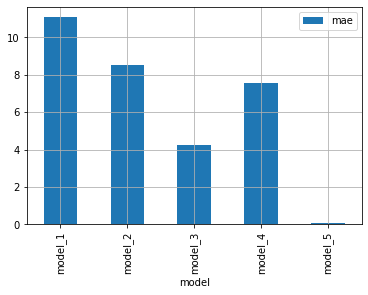

In [ ]:
# afisare grafica a valorilor mae
all_results.plot(x="model", y="mae", kind="bar", grid=True)

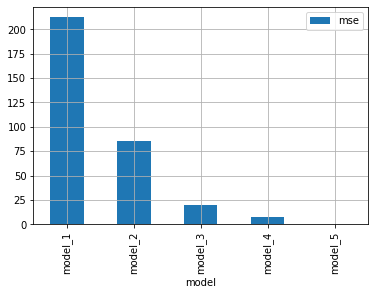

In [ ]:
 # afisare grafica a valorilor mse
all_results.plot(x="model", y="mse", kind="bar", grid=True)

# Salvarea modelului

Salvare unui model tensoFlow se realizeaza utilizand metoda `model.save()`

Salvare modelului se realizeaza pe doua cai:
* in format SavedModel (implicit) - cand se specifica doar calea de salvare
* in format HDF5 - cand se specifica denumire fisierului cu extensia .h5

In [ ]:
# salvarea model_5 in format SavedModel
model_5.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Vizualizarea continutului noului folder format "best_model_SavedModel_format"
!ls best_model_SavedModel_format

assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
# salvarea model_5 in format HDF5
model_5.save('best_model_HDF5_format.h5')

# Incarcarea modelului

In [ ]:
# Incarcarea modelului salvat in format SavedModel
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")

In [ ]:
# Vizualizarea modelului incarcat din format SavedModel cu functia summary()
loaded_saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Vizualizarea modelului model_5 cu functia summary()
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compararea predictiilor model_5 cu loaded_saved_model
model_5_preds = model_5.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_5_preds.squeeze()).numpy()

True

In [ ]:
# Incarcarea modelului salvat in format HDF5
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")

In [ ]:
# Vizualizarea modelului incarcat din format HDF5 cu functia summary()
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compararea predictiilor model_5 cu loaded_h5_model
model_5_preds = model_5.predict(X_test)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_5_preds.squeeze()).numpy()

True

# Exemplu: `Determinare costului asigurarii medicale`

## Importul bibliotecilor si a datelor

In [ ]:
# importul bibliotecilor
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importul datelor
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##Pregatirea datelor

In [ ]:
# conversia datelor non-numerice in mumerice folosind principiul codarii 
#one-hot cu ajutorul functiei pd.get_dummies()
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


### Normalizarea datelor numerice si conversia celor non-numerice cu ajutorul biblitecii sklearn

In [ ]:
# importul pachetelor necesare din sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Crearea unui transformator de coloane in care se va specifica 
# care coloane se vor supune procesului  de normalizare cu functia MinMaxScaler() si 
# care coloane se vor supune procesului de codare one-hot cu functia OneHotEncoder
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # valorile vor fi scalate in gama 0-1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # valorile se vor transforma in numerice
)

In [ ]:
# Crearea seturilor de date X si y
X = insurance.drop("charges", axis=1) 
y = insurance["charges"]

In [ ]:
# Crearea seturilor de training si de test din X si y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Implementarea transformatorului de coloane pe setul de training
ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [ ]:
# Utilizarea transformatorului de coloane pe seturile X de training si de test
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# vizualizarea primului element din X_train pina la transformare
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# vizualizarea primului element din X_train dupa transformare
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Vizualizarea dimensiunilor datelor X_train pana si dupa transfrormare
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

## Constructia modelului

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) 
])

# compilarea modelului
insurance_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae'])

# Implementarea modelului
insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13344.3066 - mae: 13344.3066
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13339.4785 - mae: 13339.4785
Epoch 3/100
34/34 [==============================] - 0s 965us/step - loss: 13325.8730 - mae: 13325.8730
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13284.3896 - mae: 13284.3896
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13156.0547 - mae: 13156.0547
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12756.2744 - mae: 12756.2744
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 11604.6348 - mae: 11604.6348
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 9815.3809 - mae: 9815.3809
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 8611.2627 - mae: 8611.2627
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8165.9170 

In [ ]:
# Verificare rezultatelor pe setul de test
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.0486 - mae: 3170.0486


[3170.048583984375, 3170.048583984375]

In [ ]:
#Vizualizare valorilor setului label de training
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [ ]:
#Vizualizarea valorii medii si mediane a setului label de training
y_train.mean(), y_train.median()

(13346.089736364489, 9575.4421)

Comparand valorile medii si mediane cu eroarea mae se observa ca rezultatele nu sunt atat de bune

## Imbunatatirea modelului prin experimente cu diferiti hiperparametri

Pornind de la modelul elaborat mai sus se vor crea mai multe model in care se vor varia diferiti hyper-parametri si se vor compara rezultatele:
1. `insurance_model_1` - se mai adauga un nivel
2. `insurance_model_2` - se creste epochs 500 epochs
3. `insurance_model_3` - se modifica functia de optimizare in Adam
4. `insurance_model_3` - se modifica learning_rate de la 0.001 (implicit) la 0.01

**`Insurance_model_1`**

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
insurance_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # se adauga un nivel cu 100 de noduri
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) 
])

# compilara modelului
insurance_model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae'])

# IMplementarea modelului
insurance_model_1.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [ ]:
# Verificare rezultatelor pe setul de test
insurance_model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 5139.3232 - mae: 5139.3232


[5139.3232421875, 5139.3232421875]

mae in cazul modelului `insurance_model_1` este mai mare decat in cazul `insurance_model` deci adaugarea unui nivel nu a imbunatatit modelul

**`Insurance_model_2`**

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) 
])

# compilarea modelului
insurance_model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae'])

# Implementarea modelului
insurance_model_2.fit(X_train_normal, y_train, epochs=500, verbose=0) # se creste epochs de la 100 la 500

In [ ]:
# Verificare rezultatelor pe setul de test
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3165.7827 - mae: 3165.7827


[3165.78271484375, 3165.78271484375]

mae in cazul modelului `insurance_model_2` este un pic mai mic in cazul `insurance_model` deci modelul a fost un pic imbunatatit

**`Insurance_model_3`**

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) 
])

# compilarea modelului
insurance_model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),  #se modifica functia de corectie din SGD in Adam
                metrics=['mae'])

# Implementarea modelului
insurance_model_3.fit(X_train_normal, y_train, epochs=500, verbose=0)

In [ ]:
# Verificare rezultatelor pe setul de test
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7751.2407 - mae: 7751.2407


[7751.24072265625, 7751.24072265625]

mae in cazul modelului `insurance_model_3` este mai mare decat in cazul `insurance_model_3` deci modificare functiei de corectie din SGD in Adam nu a imbunatatit modelul

**`Insurance_model_4`**

In [ ]:
# Setarea random seed
tf.random.set_seed(42)

# crearea modelului
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) 
])

# compilarea modelului
insurance_model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.01),  # modificare learning_rate de la 0.001 (implicit) la 0.01
                metrics=['mae'])

# Implementarea modelului
history = insurance_model_4.fit(X_train_normal, y_train, epochs=500, verbose=0)

In [ ]:
# Verificare rezultatelor pe setul de test
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.6865 - mae: 3160.6865


[3160.6865234375, 3160.6865234375]

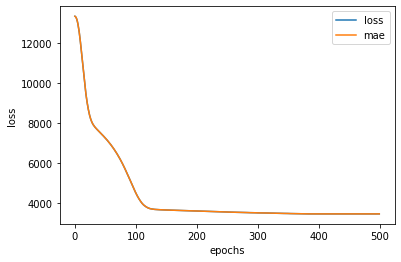

In [ ]:
# Vizualizarea grafica a variabilei history (curba de training sau curba de optimizare)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In continuare se poate de repreta experimentele cu valori diferite a diferitor hyperparametru pentru a se incerca imbuntatirea modelului

# 🛠 Neural network regression with TensorFlow Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

# 📖 Neural network regression with TensorFlow Extra-curriculum

* [MIT introduction deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.
* To practice your regression modelling with TensorFlow, I'd also encourage you to look through [Lion Bridge's collection of datasets](https://lionbridge.ai/datasets/) or [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.